# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**KOBUS LE ROUX,**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

# Libraries for data preparation and model building
from sklearn import *
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

It is also benificial to write a quick function in order to display the complete output of a dataframe that will be used throughout the notebook:

In [3]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    return

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [4]:


df = pd.read_csv("df_train.csv")



<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will perform an in-depth analysis of all the variables in the DataFrame. **Note that this analysis will be repeated after the Data Engineering process is complete, in order to compare how these metrics are affected** |

---


In [234]:
# Overview of dataframe: Basic Analysis - See notebook 3.2 on Athena (Univariate and Multivariate Analysis [Notebook])

In [235]:
# Univariate Analysis: Non-Graphical - See notebook 3.2 on Athena (Univariate and Multivariate Analysis [Notebook])

array([[<AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>,
        <AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_speed'}>],
       [<AxesSubplot:title={'center':'Seville_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_deg'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>,
        <AxesSubplot:title={'center':'Madrid_clouds_all'}>,
        <AxesSubplot:title={'center':'Seville_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>],
       [<AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Bilbao_snow_3h'}>,
        <AxesSubplot:title={'center':'Barce

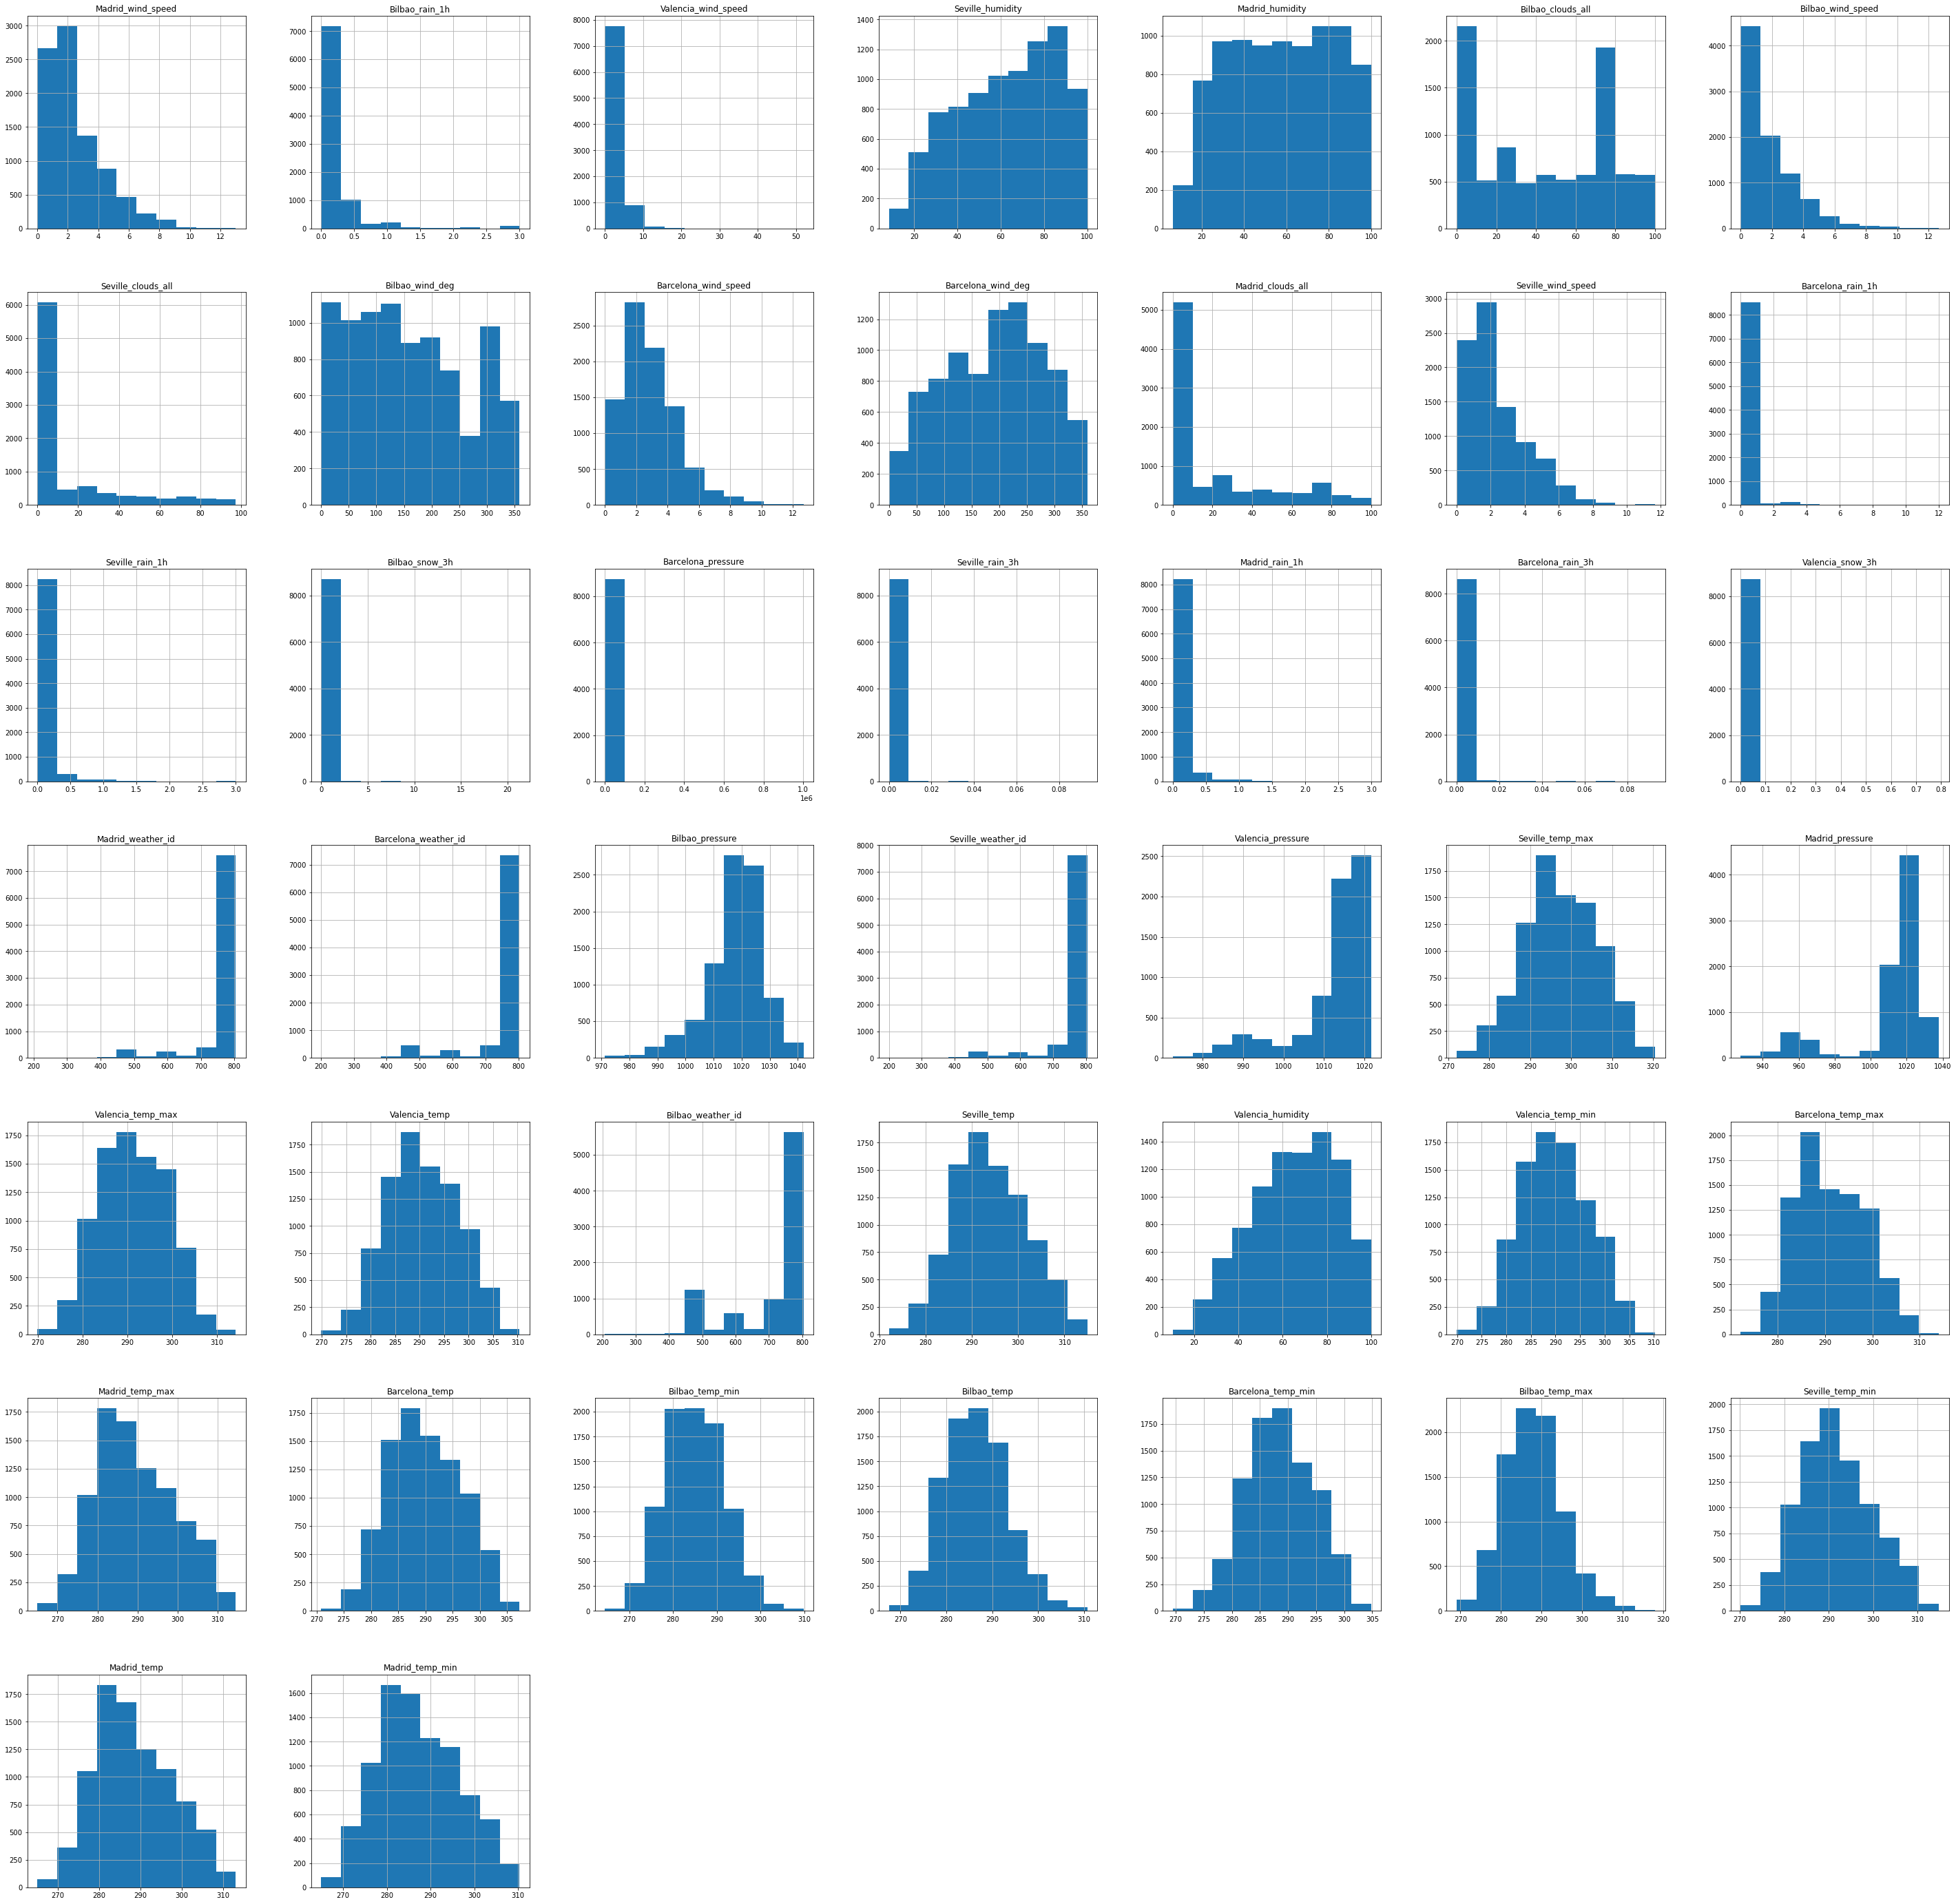

In [8]:
# Univariate Analysis: Graphical - See notebook 3.2 on Athena (Univariate and Multivariate Analysis [Notebook])
features = ['Madrid_wind_speed','Bilbao_rain_1h','Valencia_wind_speed','Seville_humidity','Madrid_humidity',
           'Bilbao_clouds_all','Bilbao_wind_speed','Seville_clouds_all','Bilbao_wind_deg','Barcelona_wind_speed',
           'Barcelona_wind_deg','Madrid_clouds_all','Seville_wind_speed', 'Barcelona_rain_1h','Seville_rain_1h',
           'Bilbao_snow_3h','Barcelona_pressure','Seville_rain_3h','Madrid_rain_1h','Barcelona_rain_3h','Valencia_snow_3h',
           'Madrid_weather_id','Barcelona_weather_id','Bilbao_pressure','Seville_weather_id','Valencia_pressure',
           'Seville_temp_max','Madrid_pressure','Valencia_temp_max','Valencia_temp','Bilbao_weather_id','Seville_temp',
           'Valencia_humidity','Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max','Barcelona_temp','Bilbao_temp_min',
           'Bilbao_temp','Barcelona_temp_min','Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp','Madrid_temp_min']
df[features].hist(figsize=(50,50))#plots histograms for all features


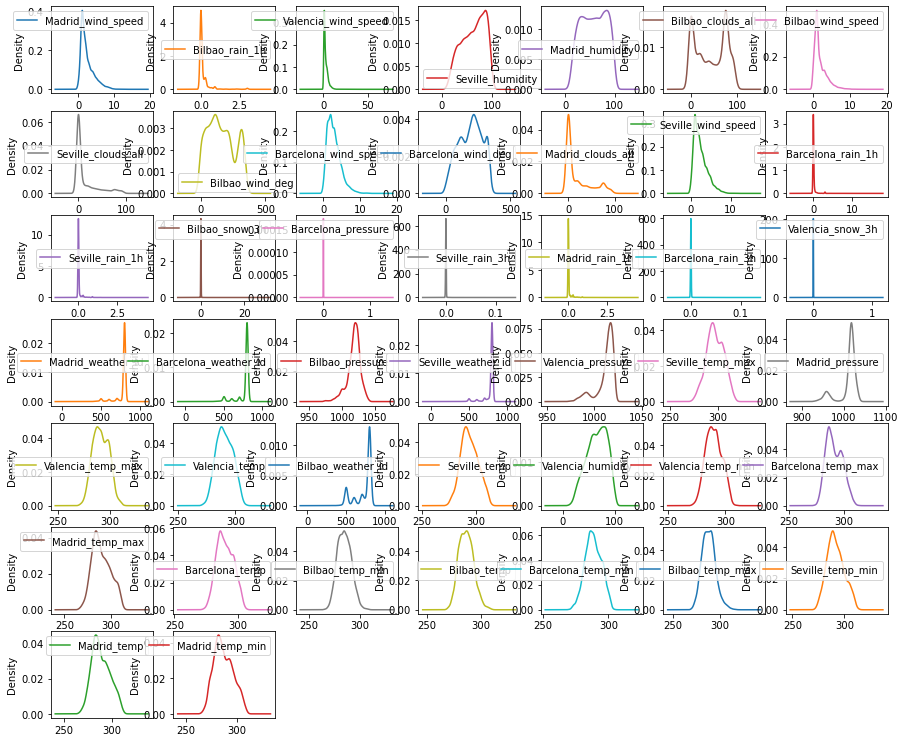

In [20]:
df[features].plot(kind='density', subplots=True, layout=(8, 7), sharex=False, figsize=(15, 15));

<AxesSubplot:xlabel='Valencia_pressure'>

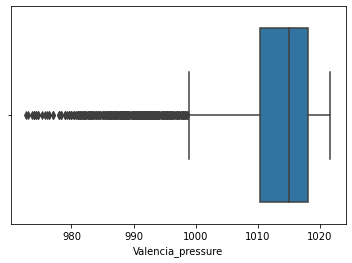

In [22]:
sns.boxplot(x='Valencia_pressure', data=df)
 

<AxesSubplot:xlabel='load_shortfall_3h'>

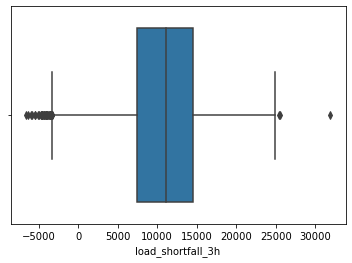

In [24]:
sns.boxplot(x='load_shortfall_3h',data=df)

In [11]:
# Multivariate Analysis: Non-Graphical  - See notebook 3.2 on Athena (Univariate and Multivariate Analysis [Notebook])

In [ ]:
# Multivariate Analysis: Graphical  - See notebook 3.2 on Athena (Univariate and Multivariate Analysis [Notebook])

In [ ]:
# Checking for Linearity - See notebook 6.4 on Athena (Multiple Linear Regression - Advanced Regression Analysis [Notebook])

In [ ]:
# Checking for Multicollinearity - See notebook 6.4 on Athena (Multiple Linear Regression - Advanced Regression Analysis [Notebook])

### 3.8  Correlations between features

Using the inbuilt functions of the *pandas* module, we can easily investigate the correlations between features by setting up a correlation matrix:

In [ ]:
# Investigate feature correlations 

df.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


Since we are looking at the correlation between 46 variables (which includes our dependent variable), it would be more benificial to draw a heatmap of correlation to easily identify strong correlations between variables   

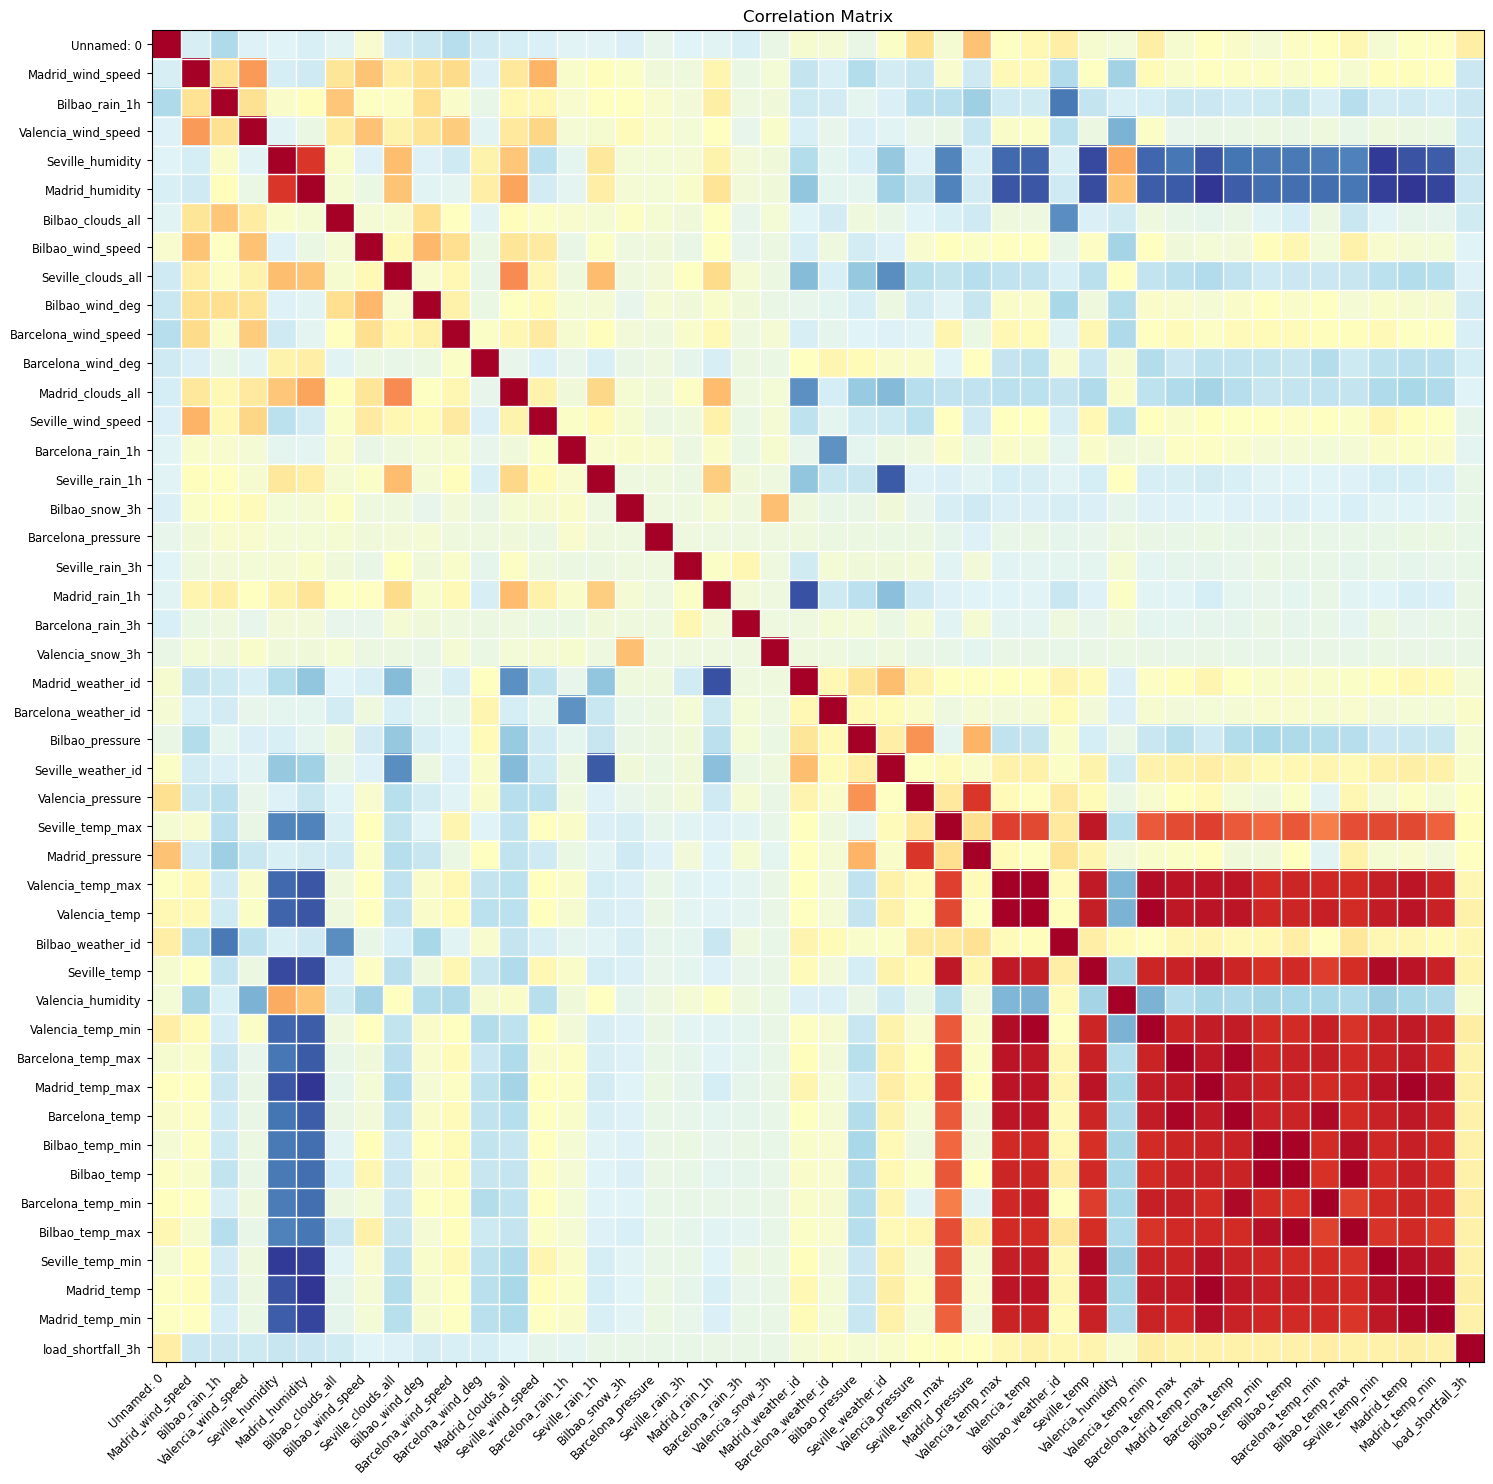

In [ ]:
#Using a heatmap to investigate feature correlations:

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

From looking at the correlation heatmap, we see that there are a large amount of strong correlations, both positive and negative, between variables in the dataset. For example: `Seville_humidity` and `Seville_temp` are very strongly neagtivley correlated, while `Valencia_temp` and `Madrid_temp` are very strongly positively correlated. This means that our dataset contains a lot of superfluous and redundant information, which will negatively impact the predictive power of the model. We will either have to select variables to include in the model manually, or make use of a regression model that automatically scales the coefficients, like a **Ridge** or **LASSO** regression model.

If we choose to include and exclude predictor variables manually, we would need to establish some criteria to apply our filtering of the data. A common way of doing this is to examine the correlation between our predictor variables, and our dependent variable `load_shortfall_3h`. We do this by using the Pearson Regression module contained in the Scipy package. This requires that no *NAN* values exist in our dataset, so just for the moment, we exclude the `Valencia_pressure` column.

In [ ]:
#The `Valencia_pressure` column is the only one containing NAN values
print_full(df.isnull().sum())

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [ ]:
corrs = df.drop("Valencia_pressure", axis="columns").corr()['load_shortfall_3h'].sort_values(ascending=False)

# Using the Pearson regression module included in the SciPy package, we can build a dictionary of correlation coefficients and p-values

dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(df[col], df['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}


df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Valencia_temp_min,0.201863,0.000000
Madrid_wind_speed,-0.150981,0.000000
Madrid_humidity,-0.150536,0.000000
Valencia_wind_speed,-0.142791,0.000000
Bilbao_clouds_all,-0.127293,0.000000
Bilbao_wind_deg,-0.120800,0.000000
Barcelona_wind_deg,-0.116133,0.000000
Barcelona_wind_speed,-0.103633,0.000000
Seville_clouds_all,-0.091804,0.000000
Madrid_clouds_all,-0.081623,0.000000


NOTE TO KOBUS --- EXPAND THIS SECTION

### 3.9  Variance of features


Another way of choosing which variables to manually include in the model, is to remove features whose values don't change much between observations, since they don't contribute much information to the model. We therefore select a variance threshold, and remove all features below this threshold. 

Since variance is dependent on scale, we will first need to normalize the features:

In [ ]:
# Seperate dependent variable (y) from independent variables (X)

X_names = list(df.columns)
y_name = "load_shortfall_3h"
X_names.remove(y_name)



In [ ]:
# investigate column types

print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [ ]:
#Remove non-numeric columns (THIS IS DONE ONLY FOR NOW. THESE COLUMNS WILL BE ENGINEERED IN THE DATA ENGINEERING SECTION, AND WILL BE INCLUDED IN THE SUBSEQUENT EDA)

X_names.remove("time")
X_names.remove("Valencia_wind_deg")
X_names.remove("Seville_pressure")


In [ ]:
X_data = df[X_names]
y_data = df[y_name]

# Normalizing the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

We can then implement an instance of the VarianceThreshold class contained in sklearn.feature_selection to select the correct subset of our features based on our chosen threshold (0.03 in this case): 

In [ ]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

Having applied this threshold to the data, we can view the calculated variance for each predictor variable:

In [ ]:
# Get column variances
column_variances = selector.variances_

# Create dictionary of column variances
vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
6,Bilbao_clouds_all,0.105945
0,Unnamed: 0,0.083352
9,Bilbao_wind_deg,0.080656
12,Madrid_clouds_all,0.078692
5,Madrid_humidity,0.067493
8,Seville_clouds_all,0.062181
11,Barcelona_wind_deg,0.061218
4,Seville_humidity,0.060892
33,Valencia_humidity,0.046143
44,Madrid_temp_min,0.041115


The above table shows the variance for each predictor variable. We can then inspect all variables before applying our threshold to see if doing so might exclude important predictors form our model

Now, we can select our new columns to include in the model:

In [ ]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# Comparing predictor varaible count before and after applying variance threshold:
print("Before threshold: ", len(df_vars.T.columns), " predictors")
print("After threshold: ", len(X_new.columns), " predictors")

Before threshold:  45  predictors
After threshold:  21  predictors


NOTE FOR KOBUS --- INSERT CONCLUSION

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we will clean the dataset, and possibly create new features - as identified in the EDA phase. Since we will build a few different models, the data engineering might differ between models. For that reason, each model built might involve their own unique data engineering process |

---

### 4.1 Engineering for a simple linear regression:

Since we will be building and comparing a few different models, we will perform the data engineering for each one seperately. To start off, we will develop a simple linear regression model. The first step is to remove redundant features. Observing the dataframe, we see that the `Unnamed: 0` column does not contribute to actual data casptured, but rather acts like the index of the dataframe. For that reason, we remove it from our dataset:

In [ ]:
# Make copy of data for use in simple linear regression
df_train_simple_linear_reg = df
df_test_simple_linear_reg = df_test

# Concatenate training and testing datasets to avoid duplicating operations
df_simple_linear_reg =  pd.concat((df_train_simple_linear_reg, df_test_simple_linear_reg))

# Drop "Unnamed: 0" column from data
df_simple_linear_reg =  df_simple_linear_reg.drop(["Unnamed: 0"], axis = "columns")

Next, we will consider the datatypes that contains missing values:

In [ ]:
# Find columns with missing values:

print_full(df_simple_linear_reg.isnull().sum())

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

Since we merged our training and testing dataset, we expect our dependent variable `load_shortfall_3h` to contain empty values. This is due to the fact that our testing data doesn't include values for the dependent variable. The only other data to contain nulls, is that of `Valencia_pressure`. Since it is numeric, we can impute this value by selecting the either the mean, median, or mode of the column:

In [ ]:
# Comparing different imputing values:

print("Mode ---> ", df_simple_linear_reg["Valencia_pressure"].mode())

print("Median ---> ", df_simple_linear_reg["Valencia_pressure"].median())

print("Mean ---> ", df_simple_linear_reg["Valencia_pressure"].mean())

Mode --->  0    1018.0
Name: Valencia_pressure, dtype: float64
Median --->  1015.0
Mean --->  1012.3466870428985


We see that there is not a big difference between these values. This indicates that any metric we select to impute on would be sufficient. For this model, we will use the mode, since it represents the most recurring value in the data.
 

In [ ]:
df_simple_linear_reg["Valencia_pressure"] = df_simple_linear_reg["Valencia_pressure"].fillna(df_simple_linear_reg["Valencia_pressure"].mode()[0])

Verifying that the null values were imputed:

In [ ]:
print_full(df_simple_linear_reg.isnull().sum())

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

Next, we recall that the `Valencia_wind_deg` and `Seville_pressure` columns were incorrectly entered as string datatypes instead of numeric datatypes. We convert them to be correct as follows:

In [ ]:
# Print initial datatypes
print("Before engineering: ", "\nValencia_wind_deg ---> ", type(df_simple_linear_reg["Valencia_wind_deg"].values[0]), "\nSeville_pressure ---> ", type(df_simple_linear_reg["Valencia_wind_deg"].values[0]))


# Extracting numeric values from columns:
df_simple_linear_reg["Valencia_wind_deg"] = df_simple_linear_reg["Valencia_wind_deg"].str.extract('(\d+)')
df_simple_linear_reg["Seville_pressure"] = df_simple_linear_reg["Seville_pressure"].str.extract('(\d+)')

# Converting to numeric data
df_simple_linear_reg["Valencia_wind_deg"] = pd.to_numeric(df_simple_linear_reg["Valencia_wind_deg"])
df_simple_linear_reg["Seville_pressure"] = pd.to_numeric(df_simple_linear_reg["Seville_pressure"])

# Print final datatypes
print("After engineering: ", "\nValencia_wind_deg ---> ", type(df_simple_linear_reg["Valencia_wind_deg"].values[0]), "\nSeville_pressure ---> ", type(df_simple_linear_reg["Valencia_wind_deg"].values[0]))




Before engineering:  
Valencia_wind_deg --->  <class 'str'> 
Seville_pressure --->  <class 'str'>
After engineering:  
Valencia_wind_deg --->  <class 'numpy.int64'> 
Seville_pressure --->  <class 'numpy.int64'>


Lastly, we have the `time` variable, which was also entered as a *string* into the database. We can convert the variable to be of type *datetime* as follows 

In [ ]:
# Converting datatype to datetime:

df_simple_linear_reg['time'] = pd.to_datetime(df_simple_linear_reg['time'])
print(type(df_simple_linear_reg.time.values[0]))

<class 'numpy.datetime64'>


Since our model is unable to use variables of type *datetime*, we will need to use dummy variable encoding to extract the year and month from the current feature:

In [ ]:
#creating new columns for the year and month:

df_simple_linear_reg["year"] = df_simple_linear_reg['time'].dt.year
df_simple_linear_reg["month"] = df_simple_linear_reg['time'].dt.month

# reindexing df so that our dependent variable is on the rightmost side:
df_simple_linear_reg = df_simple_linear_reg.reindex(columns = [col for col in df_simple_linear_reg.columns if col != 'load_shortfall_3h'] + ['load_shortfall_3h'])

# Removing datetime datatype
df_simple_linear_reg = df_simple_linear_reg.drop(['time'], axis = 'columns')


In [ ]:
# remove missing values/ features


In [ ]:
# create new features

In [ ]:
# engineer existing features

### 4.1 Engineering for a Ridge linear regression:



In [ ]:
# remove missing values/ features


In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Revisiting EDA with new features
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section we will create multiple regression models that are able to accurately predict the thee hour load shortfall. |

---

### 6.1 Modelling a simple linear regression:

The first model that we will implement, is that of a simple linear regression. First, we split the data into the corresponding train/test/validation sets:

In [23]:
# split data back into train and test datasets:
y_slr_train_dataset = df_simple_linear_reg[:len(df_train_simple_linear_reg)][['load_shortfall_3h']]
x_slr = df_simple_linear_reg[:len(df_simple_linear_reg)].drop("load_shortfall_3h", axis = "columns")

x_slr_train_dataset = df_simple_linear_reg[:len(df_train_simple_linear_reg)].drop('load_shortfall_3h', axis='columns')
x_slr_test_dataset = df_simple_linear_reg[len(df_train_simple_linear_reg):].drop('load_shortfall_3h', axis='columns')



# Use sklearn to split train dataset into training and validation sections:
x_slr_train, x_slr_validate, y_slr_train, y_slr_validate = train_test_split(x_slr_train_dataset, y_slr_train_dataset, test_size=0.2, random_state=42)

print(len(df_train_simple_linear_reg))

NameError: name 'df_simple_linear_reg' is not defined

Next, we load a simple linear regression model:


In [ ]:
slr = LinearRegression()

Fitting the model using our training data:

In [ ]:
# Training the model
slr.fit(x_slr_train, y_slr_train)

# Generate predictions on the validation set
slr_predictions = slr.predict(x_slr_validate)

Finally, we can evaluate the model performance using the root mean square error:

In [ ]:
# Function that returns the RMSE
def rmse(y_real, y_predicted):
    return np.sqrt(mean_squared_error(y_real, y_predicted))

# Tesing our model:
rmse(y_slr_validate, slr_predictions)

4885.072820636114

We can also look at the $r^2$ score of the model:

In [ ]:
r2_score(y_slr_validate, slr_predictions)

0.15264593838927387

Finally, we train the model on the complete training dataset to obtain prediction values for the test set:

In [ ]:
# Getting Correct Datasets
x_slr_train_dataset = df_simple_linear_reg[:len(df_train_simple_linear_reg)].drop('load_shortfall_3h', axis='columns')
y_slr_train_dataset = df_simple_linear_reg[:len(df_train_simple_linear_reg)][['load_shortfall_3h']]

x_slr_test_dataset = df_simple_linear_reg[len(df_train_simple_linear_reg):].drop('load_shortfall_3h', axis='columns')

# Training the model on complete test dataset:
slr.fit(x_slr_train_dataset, y_slr_train_dataset)

# Making predictions for the test values of y:
slr_submission_predictions = slr.predict(x_slr_test_dataset)

Making a csv file of the predictions to submit to kaggle:

In [ ]:
# Make Dataframe from predicted values
slr_pred_df = pd.DataFrame(slr_submission_predictions, columns=['load_shortfall_3h'])
# Make Dataframe from corresponding dates
output_df = pd.DataFrame({'time':df_test_simple_linear_reg['time']})

# Join dataframes to create a single submission dataframe
submission_df = output_df.join(slr_pred_df)

#Save submission as csv
submission_df.to_csv('TeamGM4_Simple_Linear_Regression_Kaggle_Submission', index=False)

In [ ]:
submission_df

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8989.761819
1,2018-01-01 03:00:00,8235.078237
2,2018-01-01 06:00:00,9274.548134
3,2018-01-01 09:00:00,9114.245762
4,2018-01-01 12:00:00,8891.221301
...,...,...
2915,2018-12-31 09:00:00,9438.738566
2916,2018-12-31 12:00:00,11661.968835
2917,2018-12-31 15:00:00,13557.364583
2918,2018-12-31 18:00:00,12761.483672


In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic